# Matplotlib bar chart storytelling

In [2]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv('data/norway_new_car_sales_by_make.csv')
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [4]:
df_quantity_brand = duckdb.query(
    """--sql
    SELECT 
        make AS Brand,
        SUM(quantity) AS Quantity
    FROM df
    GROUP BY brand
    ORDER BY quantity DESC
"""
).df().set_index("Brand")

df_quantity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Martin Motors,1.0
Westfield,1.0
McLaren,1.0


## Bar charts

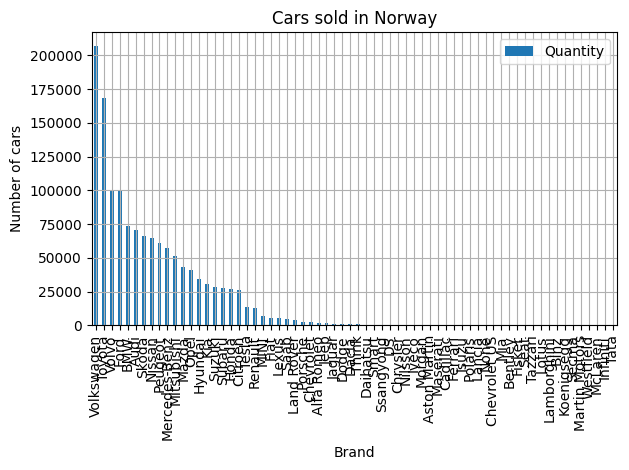

In [12]:
ax = df_quantity_brand.plot(kind='bar', title='Cars sold in Norway', ylabel='Number of cars')
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/0_bar_initial.png')

In [10]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


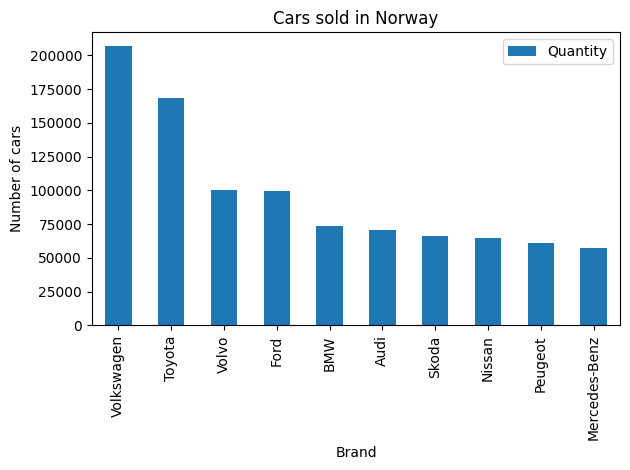

In [13]:
ax = df_quantity_brand.iloc[:10].plot(
    kind='bar', title='Cars sold in Norway', ylabel='Number of cars'
    )

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/1_bar_top10.png')

## apply data storytelling

- remove clutter
- constrast
- colors sparingly
- descriptive title
- positioning title and labels
- proximity principle with annotations
- percentage instead of absolute values
- horizontal bar

In [ ]:
# percentage
df_percentage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100

df_percentage

np.float64(100.00000000000001)

In [41]:
df_percentage_top10 = df_percentage.iloc[:10]

colors = [GRAY_1]*len(df_percentage_top10)
colors[2] = BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

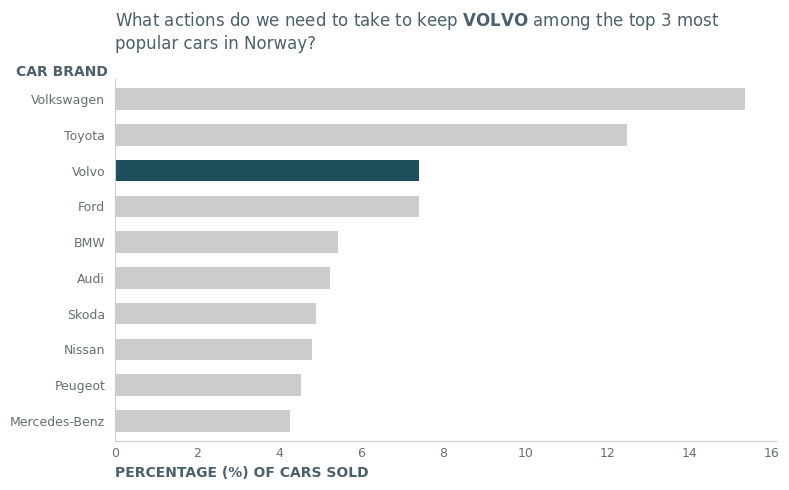

In [66]:
# horizontal bar chart
ax = df_percentage.iloc[:10].plot(
    kind='barh',
    ylabel='Number of cars',
    figsize= (8,5),
    width = 0.6,
    color=colors
    )

ax.invert_yaxis()

# remove clutter
ax.spines[["top", "right"]].set_visible(False)

# contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors = GRAY_2, labelsize=9, length=0, pad=5)
ax.tick_params(axis="y", pad=7)

# descriptive title and labels - call to action (CTA)
ax.set_title(
    "What actions do we need to take to keep "
    + r"$\bf{VOLVO}$" # LaTeX mode 
    + " among the top 3 most\npopular cars in Norway?",
    loc="left",
    color = GRAY_3,
    pad=22
    )

ax.set_xlabel("PERCENTAGE (%) OF CARS SOLD", color=GRAY_3, fontweight="bold", loc="left")
ax.set_ylabel("CAR BRAND", color=GRAY_3, fontweight="bold", rotation=0)
ax.yaxis.set_label_coords(-0.08, 1)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/2_bar_storytelling.png')